***
Welcome to this notebook!

In this  exploration, we will dive deep into the intriguing realm of transforming words into numerical representations and uncovering the remarkable ability to convey rich semantic relationships between words using **mathematical vectors**.

Throughout this journey, we will unravel the inner workings of various word embedding techniques and discover the profound implications they have on natural language processing tasks. From classic methods like one-hot encoding to more sophisticated approaches such as word2vec and GloVe, we will examine the foundations and principles that underpin these techniques.

By leveraging these powerful tools, we can represent words as points in high-dimensional vector spaces, where each dimension encapsulates meaningful semantic information. Through this process, we unlock the ability to quantify the semantic similarity between words, capture syntactic relationships, and even perform algebraic operations on these vector representations.
<br>
***

In [7]:
print ('Moh')

Moh


In [ ]:
# Import our libraries
import numpy as np
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

Let's start with a simple exercise - imagine that you would like to tell if `banana` and `orange` are similar words. For a human, we can visualize two fruits - we can understand some degree of similarity by the fact that they belong to a big category called *fruits*. For a computer, these words are just two representations of binary elements (as we've seen before).
<br>
<br>

Let's build some simple sentences where these two words `orange`, `banana` and other fruits may appear:

In [4]:
sentences = ['I bought a pear',
             'I eat a banana',
             'I ate a banana',
             'I ate a pear',
             'I carry a banana',
             'He ate a pear',
            'He bought a banana',
             'She eats a pear',
             'They ate a banana',
             'We bought a pear',
             'She ate a banana',
             'He carries a banana',
             'They ate a pear',
             'We bought a banana',
             'She ate a orange',
             'He carries a orange',
             'They carry a orange',
             'They carry a banana',
             'They carry a pear']

**How can we represent these words in terms of their relationship between each other?**

First idea: we could, as an example, represent each one of them as a vector of ones and zeros - first we extract the list of the distinct words in our vocabulary:

In [5]:
bag_words = ' '.join(sentences).lower()

In [6]:
bag_words

'i bought a pear i eat a banana i ate a banana i ate a pear i carry a banana he ate a pear he bought a banana she eats a pear they ate a banana we bought a pear she ate a banana he carries a banana they ate a pear we bought a banana she ate a orange he carries a orange they carry a orange they carry a banana they carry a pear'

In [ ]:
set(bag_words.split(' '))

{'a',
 'ate',
 'banana',
 'bought',
 'carries',
 'carry',
 'eat',
 'eats',
 'he',
 'i',
 'orange',
 'pear',
 'she',
 'they',
 'we'}

In [ ]:
vocab = list(set(bag_words.split(' ')))

In [ ]:
vocab.sort()

Let's see this in a `dataframe` format.
<br>
<br>
**(if you are familiar with Numpy and vectors, feel free to visualize it in `numpy` - dataframes are easier for beginners, and I will always to show the `df` format.)**.

In [ ]:
pd.DataFrame(np.identity(len(vocab)), index = vocab)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ate,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
banana,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bought,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
carries,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
carry,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eat,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eats,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
he,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


So we have a vector 15 dimensions for each word with 1's and 0's. We know the first word has a 1 on the first position as it is the first word of our vocabulary.
<br>
<br>
**But this is, generally, a bad representation for a word in terms of their similarity** - notice how *orange* and *she* are next to each other and they are not "related" words. Bought and banana are another example - just because words show up near each other in the alphabet, that doesn't mean that they are related in their meaning.

Let's see an alternative way of representing our words as vectors. **A really important concept in Natural Language Processing is that you can say much about a word by looking at it's neighbours**.

We will implement a simple process that will create new vectors that are not binary ones - a radical new approach to check how words relate to each other.

In [ ]:
# Let's tokenize our sentences first
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

In [ ]:
tokenized_sentences

[['i', 'bought', 'a', 'pear'],
 ['i', 'eat', 'a', 'banana'],
 ['i', 'ate', 'a', 'banana'],
 ['i', 'ate', 'a', 'pear'],
 ['i', 'carry', 'a', 'banana'],
 ['he', 'ate', 'a', 'pear'],
 ['he', 'bought', 'a', 'banana'],
 ['she', 'eats', 'a', 'pear'],
 ['they', 'ate', 'a', 'banana'],
 ['we', 'bought', 'a', 'pear'],
 ['she', 'ate', 'a', 'banana'],
 ['he', 'carries', 'a', 'banana'],
 ['they', 'ate', 'a', 'pear'],
 ['we', 'bought', 'a', 'banana'],
 ['she', 'ate', 'a', 'orange'],
 ['he', 'carries', 'a', 'orange'],
 ['they', 'carry', 'a', 'orange'],
 ['they', 'carry', 'a', 'banana'],
 ['they', 'carry', 'a', 'pear']]

**Remember our vocab again:**

In [ ]:
vocab

['a',
 'ate',
 'banana',
 'bought',
 'carries',
 'carry',
 'eat',
 'eats',
 'he',
 'i',
 'orange',
 'pear',
 'she',
 'they',
 'we']

In [ ]:
# Let's get the size of our vocab
vocab_size = len(vocab)

And now we will initialize a matrix of co-ocurrences that will have the number of times words co-ocurr in a specific "window size". Exemplifying if we only had one sentence:

With the sentence `"I went to the market and bought oranges."` we would have the following co-occurence matrix:

|index | and        | bought | I       | market        | oranges     | the | to | went |
|:---|------------:|--------:|---------:|---------------:|-------------:|-----:|----:|------:|
| and  | 0          | 1      |  0       |  1             |     0        | 0    | 0   |  0 |
| bought  | 1          | 0      |   0      |       0        |    1         |  0   | 0   | 0  |
| I  | 0          | 0      |   0      |        0       |      0       |  0   |  0  | 1  |
| market  | 1          | 0      |    0     |      0         |   0          |  1   |  0  | 0  |
| oranges  | 0          | 1      |   0      |     0          |      0       | 0    | 0   | 0  |
| the  | 0          | 0      |    0     |       1        |     0        |  0   | 1   | 0  |
| to  | 0          | 0      |  0       |      0         |      0       |  1   | 0   | 1  |
| went  | 0          | 0      |    1     |   0            |     0        | 0    | 1   |  0 |

Notice, as an example that the word **market** has 1's on the word **and** and **the** because these are the words that surround this word on our sentence - if we have more sentences we can keep incrementing this matrix with more and more words.
<br>
<br>
Let's implement this!

In [ ]:
# We start with our empty arrays
word_co_ocurrences = np.zeros([vocab_size,vocab_size])

In [ ]:
word_co_ocurrences

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [ ]:
for word in vocab:
    print(word)

a
ate
banana
bought
carries
carry
eat
eats
he
i
orange
pear
she
they
we


Disclaimer: Below we can see a non-optimized implementation that uses too many nested loops. We will just implement it in this way because we have few sentences and it is easier for us to wrap our head around the concept of `word context`.

In [ ]:
# Let's define our word window
neighbors = 1

# We will do this really slowly - these will be a bit
# nested loops but take your time in understanding
# where we're at in every loop

# First we start to iterate through our unique words
# Imagine that we are going through our indexes
for i, word in enumerate(vocab):
    # Iterate over each word in the vocabulary
    for j, pair_word in enumerate(vocab):
        # Iterate over each pair word in the vocabulary
        for position, sent in enumerate(tokenized_sentences):
            # Iterate over each sentence in the tokenized sentences
            for word_index, word_sent in enumerate(sent):
                # Iterate over each word in the sentence
                if word == word_sent:

                    first_position = max(word_index - neighbors, 0)
                    # Determine the starting position of the neighbors,
                    # making sure it doesn't go below 0

                    last_position = min(word_index + neighbors + 1, len(sent))
                    # Determine the ending position of the neighbors,
                    # making sure it doesn't exceed the sentence length

                    for neighbor in sent[first_position:last_position]:
                        # Iterate over the neighbors of the word in the sentence
                        if neighbor == pair_word:
                            # Check if the neighbor matches the pair word
                            word_co_ocurrences[i, j] += 1
                            # Increment the co-occurrence count for the word pair

Let's see this in a data frame format:

In [ ]:
word_co_occurences = pd.DataFrame(word_co_ocurrences, index=vocab, columns = vocab)

In [ ]:
word_co_occurences

,a,ate,banana,bought,carries,carry,eat,eats,he,i,orange,pear,she,they,we
a,19.0,7.0,9.0,4.0,2.0,4.0,1.0,1.0,0.0,0.0,3.0,7.0,0.0,0.0,0.0
ate,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,0.0
banana,9.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bought,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
carries,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
carry,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0
eat,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
eats,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
he,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
i,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


Obviously, we need to correct something, namely zeroing the main diagonal as words are not co-occuring with themselves:

In [ ]:
for i in range(0,len(word_co_occurences)):
    word_co_occurences.iloc[i, i] = 0

In [ ]:
word_co_occurences

,a,ate,banana,bought,carries,carry,eat,eats,he,i,orange,pear,she,they,we
a,0.0,7.0,9.0,4.0,2.0,4.0,1.0,1.0,0.0,0.0,3.0,7.0,0.0,0.0,0.0
ate,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,0.0
banana,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bought,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
carries,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
carry,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0
eat,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
eats,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
he,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
i,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


With these vectors, we can try to approximate the words in a mathematical space. Euclidean distances are known for representing relationships between word vectors poorly and the most commonly used distance is the cosine similarity:

![2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png](attachment:2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png)

In [ ]:
similarity = pd.DataFrame(cosine_similarity(word_co_occurences), index=vocab, columns = vocab)

In [ ]:
similarity

,a,ate,banana,bought,carries,carry,eat,eats,he,i,orange,pear,she,they,we
a,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.407344,0.578262,0.000000,0.000000,0.446223,0.479675,0.266076
ate,0.000000,1.000000,0.889001,0.839372,0.718421,0.896644,0.808224,0.808224,0.000000,0.000000,0.889001,0.889001,0.000000,0.000000,0.000000
banana,0.000000,0.889001,1.000000,0.852803,0.707107,0.784465,0.707107,0.707107,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
bought,0.000000,0.839372,0.852803,1.000000,0.753778,0.710806,0.753778,0.603023,0.000000,0.000000,0.852803,0.852803,0.000000,0.000000,0.000000
carries,0.000000,0.718421,0.707107,0.753778,1.000000,0.554700,0.500000,0.500000,0.000000,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000
carry,0.000000,0.896644,0.784465,0.710806,0.554700,1.000000,0.693375,0.554700,0.000000,0.000000,0.784465,0.784465,0.000000,0.000000,0.000000
eat,0.000000,0.808224,0.707107,0.753778,0.500000,0.693375,1.000000,0.500000,0.000000,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000
eats,0.000000,0.808224,0.707107,0.603023,0.500000,0.554700,0.500000,1.000000,0.000000,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000
he,0.407344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.462910,0.000000,0.000000,0.365148,0.226455,0.408248
i,0.578262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.462910,1.000000,0.000000,0.000000,0.676123,0.733799,0.377964


In [ ]:
similarity_euclidean = pd.DataFrame(euclidean_distances(word_co_occurences), index=vocab, columns = vocab)

In [ ]:
similarity_euclidean

,a,ate,banana,bought,carries,carry,eat,eats,he,i,orange,pear,she,they,we
a,0.000000,16.970563,17.521415,15.748016,15.297059,15.874508,15.099669,15.099669,14.212670,13.674794,15.329710,16.583124,14.177447,13.674794,14.628739
ate,16.970563,0.000000,4.123106,4.690416,6.164414,4.000000,6.782330,6.782330,8.246211,8.306624,5.385165,3.605551,8.185353,8.660254,8.124038
banana,17.521415,4.123106,0.000000,5.567764,7.280110,5.916080,8.062258,8.062258,9.327379,9.380832,6.000000,2.000000,9.273618,9.695360,9.219544
bought,15.748016,4.690416,5.567764,0.000000,3.162278,3.741657,3.741657,4.000000,5.291503,5.385165,2.645751,3.872983,5.196152,5.916080,5.099020
carries,15.297059,6.164414,7.280110,3.162278,0.000000,4.242641,2.449490,2.449490,3.741657,3.872983,2.236068,5.385165,3.605551,4.582576,3.464102
carry,15.874508,4.000000,5.916080,3.741657,4.242641,0.000000,4.242641,4.472136,5.656854,5.744563,3.316625,4.358899,5.567764,6.244998,5.477226
eat,15.099669,6.782330,8.062258,3.741657,2.449490,4.242641,0.000000,1.414214,2.828427,3.000000,2.236068,6.082763,2.645751,3.872983,2.449490
eats,15.099669,6.782330,8.062258,4.000000,2.449490,4.472136,1.414214,0.000000,2.828427,3.000000,2.236068,6.082763,2.645751,3.872983,2.449490
he,14.212670,8.246211,9.327379,5.291503,3.741657,5.656854,2.828427,2.828427,0.000000,2.645751,3.872983,7.416198,2.645751,3.872983,2.449490
i,13.674794,8.306624,9.380832,5.385165,3.872983,5.744563,3.000000,3.000000,2.645751,0.000000,4.000000,7.483315,2.000000,2.449490,2.645751


Notice how `euclidean_distance` represents the distances in a less effective way. In `NLP` processes, the `cosine_similarity` is normally used because of the fact that it does not take into account the magnitude of the vector (only the direction).

Let's do a function that extracts the most similar words for a specific word, according to our similarity matrix:

In [ ]:
def get_similar_word(word):
    return similarity.loc[word].sort_values(ascending=False).head(3)

In [ ]:
get_similar_word('banana')

banana    1.0
orange    1.0
pear      1.0
Name: banana, dtype: float64

In [ ]:
get_similar_word('orange')

banana    1.0
orange    1.0
pear      1.0
Name: orange, dtype: float64

In [ ]:
get_similar_word('ate')

ate       1.000000
carry     0.896644
banana    0.889001
Name: ate, dtype: float64

In [ ]:
get_similar_word('i')

i       1.000000
they    0.733799
she     0.676123
Name: i, dtype: float64

# Visualizing Vectors

Let's visualize some vectors using `matplotlib` and `seaborn`:

In [ ]:
array_example = np.array([[0, 0, 5, 2], [0, 0, -5, -2]])

Notice how these two vectors fire to different directions in a 2-D space:

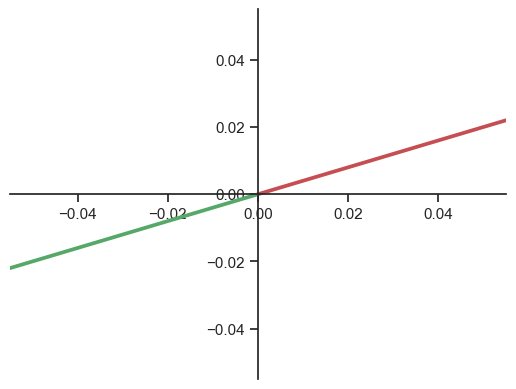

In [ ]:
X, Y, U, V = zip(*array_example)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=0.5, color=['r','g'])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

The vectors above are completely opposite and they will have a cosine similarity of `-1`. The cosine distance of these vectors is 2 as the angle that they produce is 180º:

In [ ]:
cosine_similarity(np.array([[5,2],[-5,-2]]))

array([[ 1., -1.],
       [-1.,  1.]])

An example of an orthogonal vector is the following:

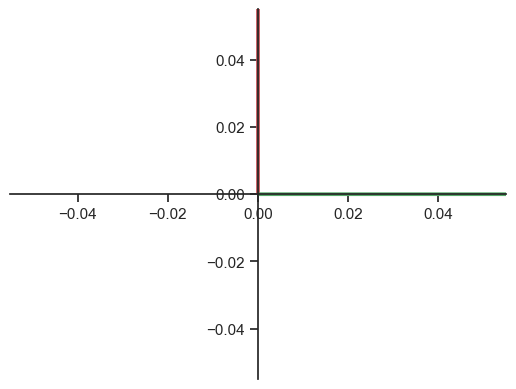

In [ ]:
array_example = np.array([[0, 0, 0, 5], [0, 0, 5, 0]])
X, Y, U, V = zip(*array_example)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=0.5, color=['r','g'])
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

Can you guess the cosine similarity of these vectors?

In [ ]:
cosine_similarity(array_example)

array([[1., 0.],
       [0., 1.]])

Perpendicular vectors have a similarity of 0!

The formula for cosine similarity is shown below but just keep in mind that a `cosine_similarity = 1` means that the vectors go to the same point in space. In the plots below we are considering a 2-dimensional space (x and y) but this behavior generalizes for `n-dimensional` vectors (such as the 15-dimensional vectors we have produced on our examples!).

![cosine-similarity.png](attachment:cosine-similarity.png)